Steg 1:
Det vi har börjat med är att vi har importerat CSV-filen i VS Code och sedan läst in filen med pandas.read_csv och eftersom filen är semikolon sepererad så har vi använt sep=";" Vi kan se att det finns 10 000 rader i varje kolumn, 10 kolumner och inga nollvärden etc. (Vi får finslipa texterna, detta är bara liten start)

In [5]:
import pandas as pd
df = pd.read_csv("car_price_dataset.csv", sep=";")
print(df.head()) #visar de första raderna i datan
print()
print(df.shape)  #kollar storlek på rader och kolumner
print()
print(df.info()) # kontrollerar kolumner och datatyper
print()

        Brand   Model  Year  Engine_Size Fuel_Type    Transmission  Mileage  \
0         Kia     Rio  2020          4.2    Diesel          Manual   289944   
1   Chevrolet  Malibu  2012          2.0    Hybrid       Automatic     5356   
2    Mercedes     GLA  2020          4.2    Diesel       Automatic   231440   
3        Audi      Q5  2023          2.0  Electric          Manual   160971   
4  Volkswagen    Golf  2003          2.6    Hybrid  Semi-Automatic   286618   

   Doors  Owner_Count  Price  
0      3            5   8501  
1      2            3  12092  
2      4            2  11171  
3      2            1  11780  
4      3            3   2867  

(10000, 10)

<class 'pandas.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         10000 non-null  str    
 1   Model         10000 non-null  str    
 2   Year          10000 non-null  int64  
 3   Engine_S

Steg 2. Grundläggande statistik (numeriska kolumner) 

Vi analyserade grundläggande statistik för numeriska variabler. Det gav en första förståelse för spridning, typiska värden och eventuella extrema observationer.


In [6]:
df.describe()

,Year,Engine_Size,Mileage,Doors,Owner_Count,Price
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,2011.543700,3.000560,149239.111800,3.497100,2.991100,8852.96440
std,6.897699,1.149324,86322.348957,1.110097,1.422682,3112.59681
min,2000.000000,1.000000,25.000000,2.000000,1.000000,2000.00000
25%,2006.000000,2.000000,74649.250000,3.000000,2.000000,6646.00000
50%,2012.000000,3.000000,149587.000000,3.000000,3.000000,8858.50000
75%,2017.000000,4.000000,223577.500000,4.000000,4.000000,11086.50000
max,2023.000000,5.000000,299947.000000,5.000000,5.000000,18301.00000


Kategoriska variabler (räkna värden)

Vi analyserade fördelningen av kategoriska variabler för att förstå databalansen mellan olika klasser.

In [8]:
categorical_cols = ['Brand', 'Model', 'Fuel_Type', 'Transmission']

for col in categorical_cols:
    print(f"\n--- {col} ---")
    print(df[col].value_counts())



--- Brand ---
Brand
Ford          1048
Audi          1038
Volkswagen    1020
Honda         1009
Chevrolet     1003
BMW            999
Hyundai        995
Kia            976
Toyota         970
Mercedes       942
Name: count, dtype: int64

--- Model ---
Model
Accord      365
Fiesta      363
Impala      355
5 Series    353
Tiguan      352
Focus       351
Q5          350
A4          350
Elantra     347
Golf        339
A3          338
Civic       336
Optima      336
3 Series    335
Explorer    334
Malibu      333
Tucson      329
Passat      329
Rio         327
Corolla     325
RAV4        324
Camry       321
E-Class     321
Sonata      319
GLA         315
Equinox     315
Sportage    313
X5          311
CR-V        308
C-Class     306
Name: count, dtype: int64

--- Fuel_Type ---
Fuel_Type
Electric    2625
Diesel      2512
Hybrid      2453
Petrol      2410
Name: count, dtype: int64

--- Transmission ---
Transmission
Manual            3372
Automatic         3317
Semi-Automatic    3311
Name: cou

In [9]:
df['Fuel_Type'].value_counts()


Fuel_Type
Electric    2625
Diesel      2512
Hybrid      2453
Petrol      2410
Name: count, dtype: int64

In [10]:
# Vi kontrollerade förekomsten av saknade värden och kunde konstatera att datasetet inte innehåller några tomma värden.

df.isna().sum()

Brand           0
Model           0
Year            0
Engine_Size     0
Fuel_Type       0
Transmission    0
Mileage         0
Doors           0
Owner_Count     0
Price           0
dtype: int64

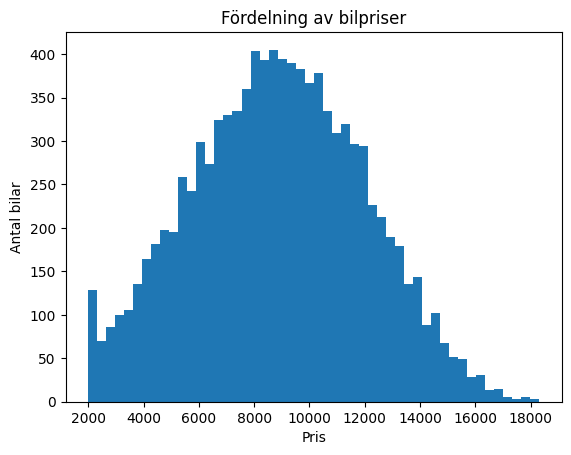

In [11]:
# Visualisera data

import matplotlib.pyplot as plt

plt.hist(df['Price'], bins=50)
plt.title("Fördelning av bilpriser")
plt.xlabel("Pris")
plt.ylabel("Antal bilar")
plt.show()


Histogrammet visar fördelningen av bilpriser i datasetet. Fördelningen är unimodal med en tydlig topp runt 8 000–10 000, vilket indikerar att majoriteten av bilarna ligger i detta prisspann. Fördelningen är svagt högerskev, med ett mindre antal bilar som har betydligt högre priser. Detta tyder på förekomst av dyrare bilar som kan betraktas som potentiella outliers. Resultatet ger en god förståelse för målvariabelns spridning och är viktig inför fortsatt modellering.

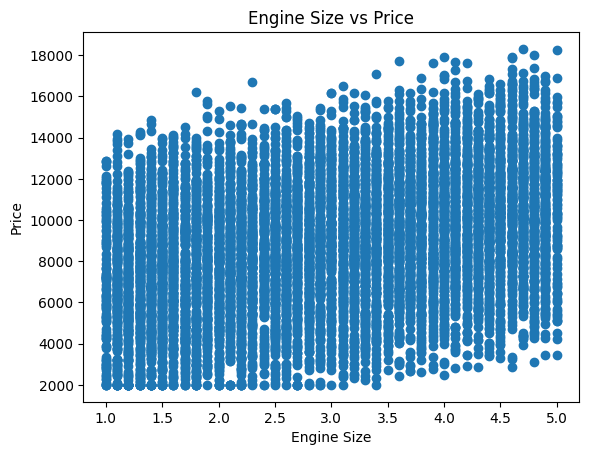

In [12]:
# Samband mellan variabler och Price
# Engine size vs Price

plt.scatter(df['Engine_Size'], df['Price'])
plt.xlabel("Engine Size")
plt.ylabel("Price")
plt.title("Engine Size vs Price")
plt.show()


Diagrammet visar sambandet mellan motorstorlek (Engine Size) och bilpris. Det finns ett tydligt positivt samband, där större motorstorlek generellt är associerad med högre priser. Samtidigt observeras en relativt stor spridning i priset för varje motorstorlek, vilket indikerar att även andra faktorer påverkar bilpriset. Trots spridningen framstår Engine Size som en viktig prediktor för pris i den fortsatta modelleringen.

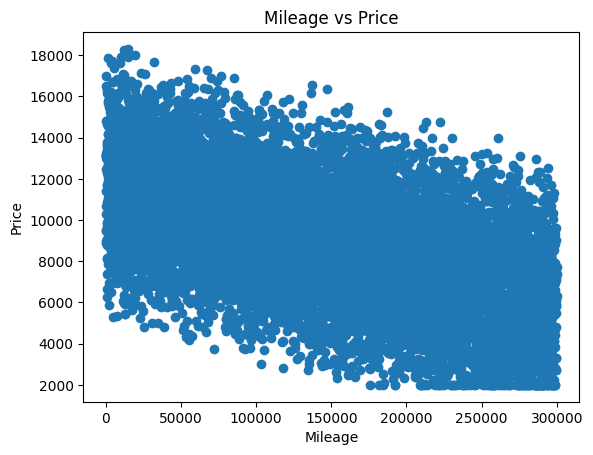

In [13]:
# Mileage vs Price

plt.scatter(df['Mileage'], df['Price'])
plt.xlabel("Mileage")
plt.ylabel("Price")
plt.title("Mileage vs Price")
plt.show()

Diagrammet visar sambandet mellan körsträcka (Mileage) och bilpris. Det finns ett tydligt negativt samband där högre körsträcka generellt är förknippad med lägre pris. Bilar med låg körsträcka uppvisar högre och mer varierande priser, medan priserna tenderar att minska och samlas på lägre nivåer vid högre körsträckor. Detta indikerar att Mileage är en viktig faktor för att förklara variationen i bilpriser och bör inkluderas i den fortsatta modelleringen.

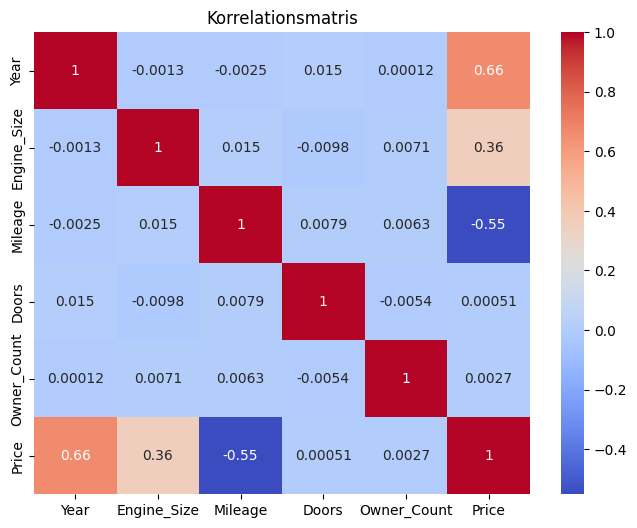

In [15]:
# Korrelationsmatris

import seaborn as sns

plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Korrelationsmatris")
plt.show()

Korrelationsmatrisen visar sambanden mellan de numeriska variablerna i datasetet. Resultaten indikerar att bilpriset har en stark positiv korrelation med tillverkningsår (Year), vilket innebär att nyare bilar generellt har högre priser. Det finns även en måttlig positiv korrelation mellan motorstorlek (Engine Size) och pris. Samtidigt observeras en tydlig negativ korrelation mellan körsträcka (Mileage) och pris, vilket tyder på att bilar med högre körsträcka tenderar att ha lägre värde. Övriga variabler uppvisar svaga eller obetydliga samband med priset.

Kort sammanfattning: Baserat på den explorativa dataanalysen valdes Year, Mileage och Engine Size som numeriska variabler, då dessa uppvisade tydliga samband med priset. De kategoriska variablerna Fuel_Type och Transmission inkluderades eftersom de har ett begränsat antal kategorier och förväntas påverka bilpriset. Variablerna Model och Owner_Count exkluderades på grund av hög dimensionalitet respektive låg korrelation med målvariabeln.